# DonorsChoose

In [1]:
import warnings 
warnings.filterwarnings("ignore")
!jupyter nbconvert --to html vamshinallagonda@gmail.com_DCA_copy1.ipynb


[NbConvertApp] Converting notebook vamshinallagonda@gmail.com_DCA_copy1.ipynb to html
[NbConvertApp] Writing 708456 bytes to vamshinallagonda@gmail.com_DCA_copy1.html


In [2]:
import warnings 
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

C:\Users\vamshi goud\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv') 
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)
print("The attributes of data :", resource_data.columns.values)
#print(project_data)
project_data.isnull().sum()
print (project_data[['school_state','school_state','project_subject_categories','project_subject_subcategories','project_grade_category']].isnull())

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']
The attributes of data : ['id' 'description' 'quantity' 'price']
        school_state  school_state  project_subject_categories  \
0              False         False                       False   
1              False         False                       False   
2              False         False                       False   
3              False         False                       False   
4              False         False                       False   
5              False         False           

[109248 rows x 5 columns]


In [52]:
price_data = resource_data.groupby('id').agg({'price':'sum'}).reset_index()
price_data.head()

,id,price
0,p000001,459.56
1,p000002,515.89
2,p000003,298.97
3,p000004,1113.69
4,p000005,485.99


In [54]:
project_data = pd.merge(project_data, price_data, on='id',how='left') 
project_data.drop_duplicates()
print(project_data.head(5))

   Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, 

In [7]:
from sklearn.preprocessing import Imputer,OneHotEncoder
df = project_data[['teacher_prefix','school_state','project_subject_categories','project_subject_subcategories','project_grade_category',]]
df.head(5)
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)


In [8]:
#citation:https://www.youtube.com/watch?v=9yl6-HEY7_s
df = project_data[['teacher_prefix','school_state','project_subject_categories','project_subject_subcategories','project_grade_category',]]
df.head(5)
data_dummies = pd.get_dummies(df)
print(df.head(5))
dummies1=pd.get_dummies(df.teacher_prefix)
dummies2=pd.get_dummies(df.school_state)

dummies3=pd.get_dummies(df.project_subject_categories)
dummies4=pd.get_dummies(df.project_subject_subcategories)
dummies5=pd.get_dummies(df.project_grade_category)

  teacher_prefix school_state           project_subject_categories  \
0           Mrs.           IN                  Literacy & Language   
1            Mr.           FL    History & Civics, Health & Sports   
2            Ms.           AZ                      Health & Sports   
3           Mrs.           KY  Literacy & Language, Math & Science   
4           Mrs.           TX                       Math & Science   

      project_subject_subcategories project_grade_category  
0                     ESL, Literacy          Grades PreK-2  
1  Civics & Government, Team Sports             Grades 6-8  
2    Health & Wellness, Team Sports             Grades 6-8  
3             Literacy, Mathematics          Grades PreK-2  
4                       Mathematics          Grades PreK-2  


In [9]:
merge = pd.concat([df,dummies1,dummies2,dummies3,dummies4,dummies5],axis=1)
print(merge)

       teacher_prefix school_state             project_subject_categories  \
0                Mrs.           IN                    Literacy & Language   
1                 Mr.           FL      History & Civics, Health & Sports   
2                 Ms.           AZ                        Health & Sports   
3                Mrs.           KY    Literacy & Language, Math & Science   
4                Mrs.           TX                         Math & Science   
5                Mrs.           FL     Literacy & Language, Special Needs   
6                Mrs.           CT     Literacy & Language, Special Needs   
7                 Ms.           GA                         Math & Science   
8                Mrs.           SC                        Health & Sports   
9                 Ms.           NC                    Literacy & Language   
10               Mrs.           CA                    Literacy & Language   
11                Ms.           CA  Literacy & Language, Applied Learning   

[109248 rows x 517 columns]


In [10]:
final = merge.drop(['teacher_prefix',
'school_state',
'project_subject_categories',
'project_subject_subcategories',
'project_grade_category'],axis=1)
print(final)

        Dr.  Mr.  Mrs.  Ms.  Teacher  AK  AL  AR  AZ  CA      ...        \
0         0    0     1    0        0   0   0   0   0   0      ...         
1         0    1     0    0        0   0   0   0   0   0      ...         
2         0    0     0    1        0   0   0   0   1   0      ...         
3         0    0     1    0        0   0   0   0   0   0      ...         
4         0    0     1    0        0   0   0   0   0   0      ...         
5         0    0     1    0        0   0   0   0   0   0      ...         
6         0    0     1    0        0   0   0   0   0   0      ...         
7         0    0     0    1        0   0   0   0   0   0      ...         
8         0    0     1    0        0   0   0   0   0   0      ...         
9         0    0     0    1        0   0   0   0   0   0      ...         
10        0    0     1    0        0   0   0   0   0   1      ...         
11        0    0     0    1        0   0   0   0   0   1      ...         
12        0    0     1   

[109248 rows x 512 columns]


In [11]:
print('original data',list(df.columns))
#dfnum = data_dummies.ix[:'school_state':'project_grade_category_transport-moving']


original data ['teacher_prefix', 'school_state', 'project_subject_categories', 'project_subject_subcategories', 'project_grade_category']


In [12]:
#print("The attributes of data :", resource_data.columns.value)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()
x = [{'feature':'teacher_prefix'},
     {'feature':'school_state'},
     {'feature':'project_subject_categories'},
      {'feature':'project_subject_subcategories'},
    {'feature':'project_grade_category'}]

final_cat = onehot_encoder.fit_transform(x).toarray()
print(final_cat.shape)


(5, 5)


In [13]:
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [17]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


In [18]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [01:56<00:00, 937.91it/s]


In [19]:
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [20]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
sent1 = decontracted(project_data['project_title'].values[10456])
print(sent1)


21st Century Classroom


In [21]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent1 = sent1.replace('\\r', ' ')
sent1 = sent1.replace('\\"', ' ')
sent1 = sent1.replace('\\n', ' ')
print(sent1)

21st Century Classroom


In [22]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
print(sent1)

21st Century Classroom


In [23]:
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent1 = decontracted(sentance)
    sent1 = sent.replace('\\r', ' ')
    sent1 = sent.replace('\\"', ' ')
    sent1 = sent.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent1.lower().strip())
   

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:25<00:00, 1276.15it/s]


In [24]:
vectorizer = CountVectorizer(min_df=1)
text_bow = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 132)


In [25]:
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 132)


In [26]:
from tqdm import tqdm
import pickle
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.6B.300d.txt')
with open('glove.6B.200d.txt', 'rb') as f:
    
   # model = pickle.load()
    glove_words =  set(model.keys())

Loading Glove Model


400000it [01:45, 3773.89it/s]


Done. 400000  words loaded!


In [27]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)
print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:51<00:00, 2129.44it/s]


109248
300


In [28]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [1]:
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

NameError: name 'tqdm' is not defined

In [60]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)\n",
price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar_num.mean_[0]}, Standard deviation : {np.sqrt(price_scalar_num.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))
print(price_standardized.shape)

(109248, 1)


In [61]:
from sklearn.preprocessing import StandardScaler
price_scalar_num = StandardScaler()
price_scalar_num.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar_num.mean_[0]}, Standard deviation : {np.sqrt(price_scalar_num.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_num = price_scalar_num.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(price_standardized_num.shape)

Mean : 11.153165275336848, Standard deviation : 27.77702641477403
(109248, 1)


In [73]:
price_merge = np.vstack([price_standardized,price_standardized_num])
price_merge.resize(109248,1)
print(price_merge.shape)

(109248, 1)


In [89]:
labels = StandardScaler()
labels.fit(project_data['project_is_approved'].values.reshape(-1,1))

labels_d = labels.transform(project_data['project_is_approved'].values.reshape(-1, 1))

print(labels_d)


[[-2.36733606]
 [ 0.42241573]
 [-2.36733606]
 ...
 [ 0.42241573]
 [ 0.42241573]
 [ 0.42241573]]


In [91]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

X = hstack((final,price_merge))

Y= X.toarray()


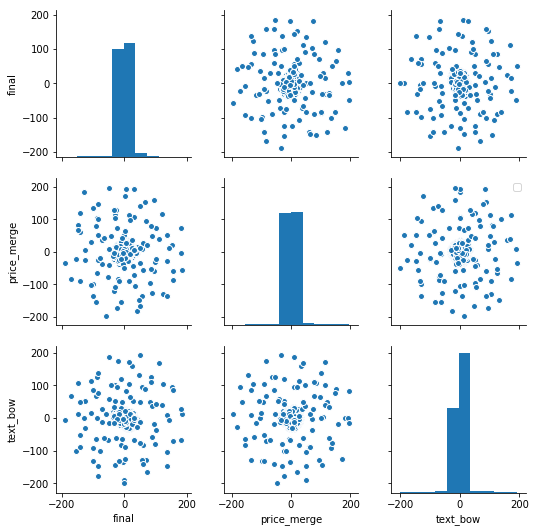

In [124]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt



data_15000 = Y[0:2000,:]
labels_d = labels_d[0:2000,]
model = TSNE(n_components=3,random_state=0)
tsne_data = model.fit_transform(data_15000)
tsne_data1 = model.fit_transform(labels_d)
tsne_data2 = np.vstack((tsne_data,tsne_data1))
tsnedf = pd.DataFrame(data=tsne_data2,columns=('final','price_merge','text_bow'))

#sns.FacetGrid(tsnedf,hue='price_merge',size=6).map(plt.scatter,'final','price_merge','text_bow')
sns.pairplot(tsnedf)
plt.legend(labels_d)
plt.show()


# Observations

In [115]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

a = hstack((final,price_merge,text_tfidf))
b= a.toarray()
print(b)

[[0.         0.         1.         ... 0.06523281 0.13046561 0.06523281]
 [0.         1.         0.         ... 0.06523281 0.13046561 0.06523281]
 [0.         0.         0.         ... 0.06523281 0.13046561 0.06523281]
 ...
 [0.         0.         1.         ... 0.06523281 0.13046561 0.06523281]
 [0.         0.         1.         ... 0.06523281 0.13046561 0.06523281]
 [0.         0.         0.         ... 0.06523281 0.13046561 0.06523281]]


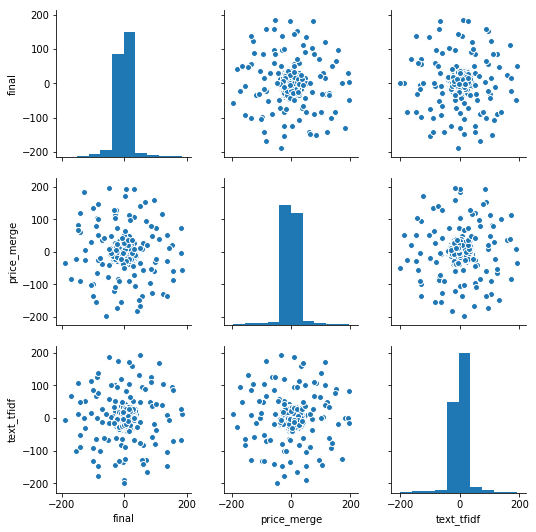

In [121]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt



data_5000 = b[0:1000,:]
labels_5000 = labels_d[0:1000,]
model = TSNE(n_components=3,random_state=0)
tsne_data3 = model.fit_transform(data_5000)
tsne_data4 = model.fit_transform(labels_5000)
tsne_data5 = np.vstack((tsne_data3,tsne_data4))
tsnedf = pd.DataFrame(data=tsne_data5,columns=('final','price_merge','text_tfidf'))
#sns.FacetGrid(tsnedf,size=8).map(plt.scatter,'final','price_merge','text_tfidf')
sns.pairplot(tsnedf)
plt.show()

# Observations

In [117]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

c = hstack((final,price_merge,avg_w2v_vectors))
d= c.toarray()
print(d)

[[ 0.          0.          1.         ... -0.14688239 -0.07364446
  -0.02157144]
 [ 0.          1.          0.         ... -0.14688239 -0.07364446
  -0.02157144]
 [ 0.          0.          0.         ... -0.14688239 -0.07364446
  -0.02157144]
 ...
 [ 0.          0.          1.         ... -0.14688239 -0.07364446
  -0.02157144]
 [ 0.          0.          1.         ... -0.14688239 -0.07364446
  -0.02157144]
 [ 0.          0.          0.         ... -0.14688239 -0.07364446
  -0.02157144]]


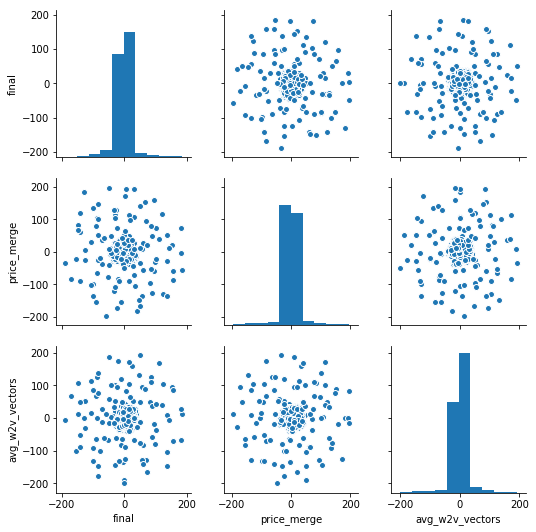

In [118]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt



data_6000 = d[0:1000,:]
labels_5000 = labels_d[0:1000,]
model = TSNE(n_components=3,random_state=0)
tsne_data6 = model.fit_transform(data_6000)
tsne_data7 = model.fit_transform(labels_5000)
tsne_data8 = np.vstack((tsne_data6,tsne_data7))
tsnedf = pd.DataFrame(data=tsne_data8,columns=('final','price_merge','avg_w2v_vectors'))
#sns.FacetGrid(tsnedf,size=8).map(plt.scatter,'final','price_merge','avg_w2v_vectors')
sns.pairplot(tsnedf)
#plt.legend()
plt.show()

# Observations

In [119]:
e = hstack((final,price_merge,tfidf_w2v_vectors))
f= e.toarray()
print(f)


[[ 0.          0.          1.         ... -0.18658553 -0.11361065
  -0.03074291]
 [ 0.          1.          0.         ... -0.18658553 -0.11361065
  -0.03074291]
 [ 0.          0.          0.         ... -0.18658553 -0.11361065
  -0.03074291]
 ...
 [ 0.          0.          1.         ... -0.18658553 -0.11361065
  -0.03074291]
 [ 0.          0.          1.         ... -0.18658553 -0.11361065
  -0.03074291]
 [ 0.          0.          0.         ... -0.18658553 -0.11361065
  -0.03074291]]


No handles with labels found to put in legend.


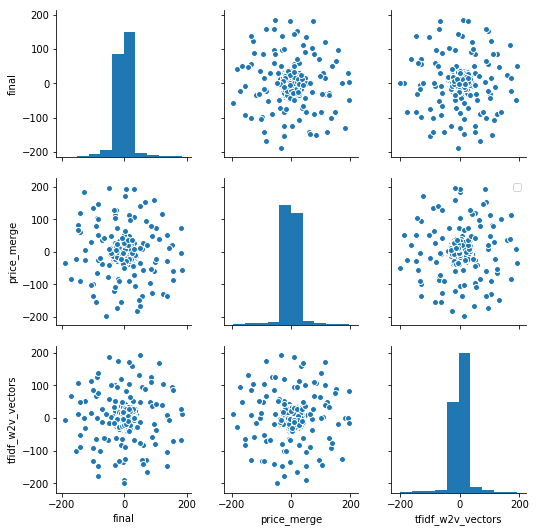

In [123]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt



data_7000 = f[0:1000,:]
labels_5000 =labels_d[0:1000,]
model = TSNE(n_components=3,random_state=0)
tsne_data9 = model.fit_transform(data_7000)
tsne_data10 = model.fit_transform(labels_5000)
tsne_data11 = np.vstack((tsne_data9,tsne_data10))
tsnedf = pd.DataFrame(data=tsne_data11,columns=('final','price_merge','tfidf_w2v_vectors'))
#sns.FacetGrid(tsnedf,size=8).map(plt.scatter,'dim_1','dim_2')
sns.pairplot(tsnedf)
plt.legend()
plt.show()

# Observations